Manual Confusion Matrix:
TN=0, FP=2, FN=1, TP=1


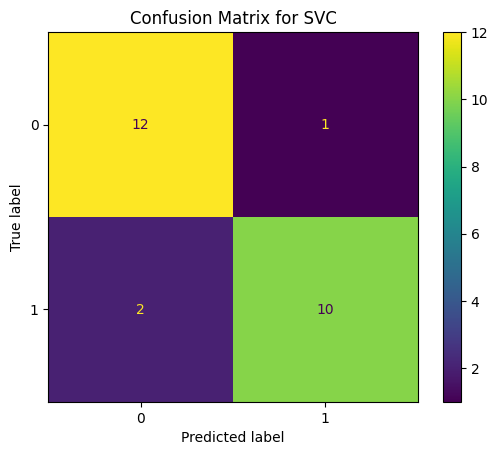

Macro F1: 0.26666666666666666
Micro F1: 0.3333333333333333
Weighted F1: 0.26666666666666666
F1 per class: [0.8 0.  0. ]
Accuracy: 0.3333333333333333
Precision (macro): 0.2222222222222222
Recall (macro): 0.3333333333333333
              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         2
     class 2       0.00      0.00      0.00         2

    accuracy                           0.33         6
   macro avg       0.22      0.33      0.27         6
weighted avg       0.22      0.33      0.27         6

ROC AUC (binary): 0.994767718408118
ROC AUC (multiclass, ovr): 0.9913333333333334


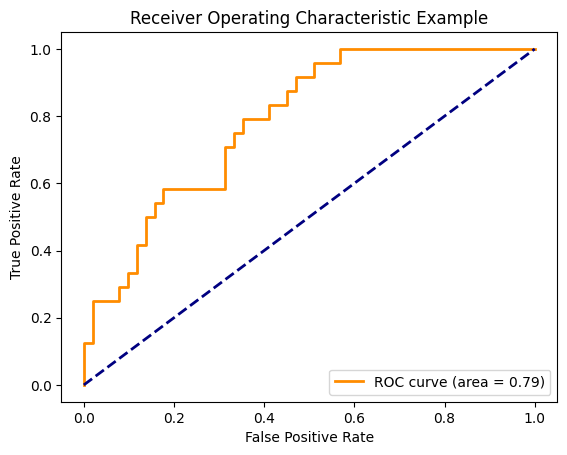

Log Loss: 0.21616187468057912
Mean Squared Error (MSE): 0.375
Mean Absolute Error (MAE): 0.5
R squared (R^2): 0.9486081370449679


In [3]:
### Unit 11 - e-Portfolio Activity: Model Performance Measurement
### Demonstrates classification and regression metrics with explanations.

# ----------------------------
# 1. Import Libraries
# ----------------------------
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, f1_score,
                             accuracy_score, precision_score, recall_score,
                             classification_report, roc_auc_score, roc_curve, auc,
                             log_loss, mean_squared_error, mean_absolute_error, r2_score)

# ----------------------------
# 2. Confusion Matrix Example
# ----------------------------
# Manual example
y_true_manual = [0, 1, 0, 1]
y_pred_manual = [1, 1, 1, 0]

# confusion_matrix returns [[TN, FP], [FN, TP]]; ravel flattens to 1D
tn, fp, fn, tp = confusion_matrix(y_true_manual, y_pred_manual).ravel()
print(f"Manual Confusion Matrix:\nTN={tn}, FP={fp}, FN={fn}, TP={tp}")
# Expected output: counts of True Negatives, False Positives, False Negatives, True Positives

# SVC classifier on synthetic dataset
X, y = make_classification(random_state=0)  # generate dataset with features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  # split 75% train, 25% test

clf = SVC(random_state=0)
clf.fit(X_train, y_train)  # train the model
predictions = clf.predict(X_test)  # predict on test set

# Display confusion matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix for SVC")
plt.show()
# Output: graphical confusion matrix showing correct vs incorrect classifications

# ----------------------------
# 3. F1, Accuracy, Precision, Recall
# ----------------------------
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

# F1 scores
print("Macro F1:", f1_score(y_true, y_pred, average='macro'))  # average per class
print("Micro F1:", f1_score(y_true, y_pred, average='micro'))  # global average
print("Weighted F1:", f1_score(y_true, y_pred, average='weighted'))  # weighted by class size
print("F1 per class:", f1_score(y_true, y_pred, average=None))  # F1 per individual class

# Accuracy, Precision, Recall
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))

# Classification report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))
# Output: precision, recall, f1-score, and support for each class

# ----------------------------
# 4. ROC AUC Scores
# ----------------------------
# Binary classification - Breast Cancer dataset
X_bc, y_bc = load_breast_cancer(return_X_y=True)
clf_bc = LogisticRegression(solver="liblinear", random_state=0).fit(X_bc, y_bc)
y_prob_bc = clf_bc.predict_proba(X_bc)[:, 1]  # probability of positive class
print("ROC AUC (binary):", roc_auc_score(y_bc, y_prob_bc))
# Output: AUC score between 0 and 1, higher = better discrimination

# Multiclass classification - Iris dataset
X_iris, y_iris = load_iris(return_X_y=True)
clf_iris = LogisticRegression(solver="liblinear").fit(X_iris, y_iris)
y_prob_iris = clf_iris.predict_proba(X_iris)
print("ROC AUC (multiclass, ovr):", roc_auc_score(y_iris, y_prob_iris, multi_class='ovr'))
# Output: multiclass AUC using one-vs-rest strategy

# ----------------------------
# 5. Multiclass ROC Curve Visualization
# ----------------------------
iris = load_iris()
X = iris.data
y = label_binarize(iris.target, classes=[0, 1, 2])  # one-hot encoding
n_classes = y.shape[1]

# Add noise features to make problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
# Output: new X with many noisy features → metric performance may decrease

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# One-vs-Rest SVM classifier
classifier = OneVsRestClassifier(SVC(kernel="linear", probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for class 2
plt.figure()
plt.plot(fpr[2], tpr[2], color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc[2]:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Example")
plt.legend(loc="lower right")
plt.show()
# Output: ROC curve plot with area under curve (AUC) for class 2

# ----------------------------
# 6. Log Loss Example
# ----------------------------
y_true_log = ["spam", "ham", "ham", "spam"]
y_prob_log = [[.1, .9], [.9, .1], [.8, .2], [.35, .65]]
print("Log Loss:", log_loss(y_true_log, y_prob_log))
# Output: log loss value (lower is better)

# ----------------------------
# 7. Regression Metrics
# ----------------------------
y_true_reg = [3, -0.5, 2, 7]
y_pred_reg = [2.5, 0.0, 2, 8]

print("Mean Squared Error (MSE):", mean_squared_error(y_true_reg, y_pred_reg))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true_reg, y_pred_reg))
print("R squared (R^2):", r2_score(y_true_reg, y_pred_reg))
# Output: MSE, MAE measure error magnitude; R² measures model fit (closer to 1 = better fit)

# ----------------------------
# Notes on parameter changes:
# ----------------------------
# 1. Changing random_state or test_size slightly changes train/test split → metrics change.
# 2. Adding noise/features decreases accuracy/F1, increases errors, lowers R²/AUC.
# 3. Changing classifier (SVC vs LogisticRegression) and hyperparameters (kernel, C) affects AUC and R².
# 4. Micro vs Macro averaging affects metric interpretation (global vs per-class).

